In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle

import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch.utils.data import Dataset, DataLoader

from scripts.utils import train_keys, target_keys
from scripts.QLKNN import QLKNNDataset, QLKNN

plt.style.use("default")
%matplotlib inline

In [2]:
x = pd.read_pickle("/share/rcifdata/jbarr/gp_outputs.pkl")

In [3]:
test_data_path = "../../data/test_data_clipped.pkl"
train_data_path = "../../data/train_data_clipped.pkl"

predictions_list = {}

for target in target_keys:
    path = glob.glob(f"../../logs/QLKNN-Regressor/Run-6/Run-6-{target}/*.ckpt")[0]
    model = QLKNN.load_from_checkpoint(path, n_input = 15, batch_size = 2048, epochs = 25, learning_rate = 0.002)
    
    train_data = QLKNNDataset(test_data_path, columns = train_keys + [target], train = True)
    train_data.scale()

    test_data = QLKNNDataset(test_data_path, columns = train_keys + [target], train = False)
    test_data.scale()

    test_loader = DataLoader(test_data, batch_size = 2048, shuffle = True, num_workers = 1)
    
    y = test_data.data[target]
    y = torch.tensor(y.values)
    X = test_data.data[train_keys]
    X = torch.tensor(X.values)
    
    predictions = model(X).detach().numpy()
    predictions_list[target] = predictions

In [1]:
#idx = np.random.choice(len(test_data.data), 10_000, replace = False)

for target in target_keys:
    
    train_data = QLKNNDataset(test_data_path, columns = train_keys + [target], train = True)
    train_data.scale()
    
    test_data = QLKNNDataset(test_data_path, columns =  train_keys + [target], train = False)
    test_data.scale()  
    
    plt.figure()
    
    x_ = np.linspace(test_data.data[target].min(), test_data.data[target].max(), 100)
    
    plt.plot(test_data.data[target], predictions_list[target], "o")
    plt.plot(x_, x_, "--")
    
    plt.xlabel(target)

NameError: name 'target_keys' is not defined

/var/tmp/ipykernel_88692/4245014440.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


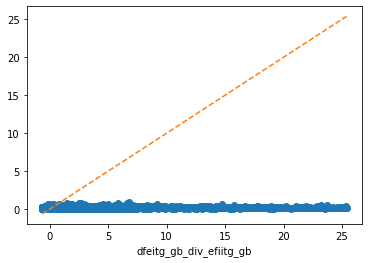

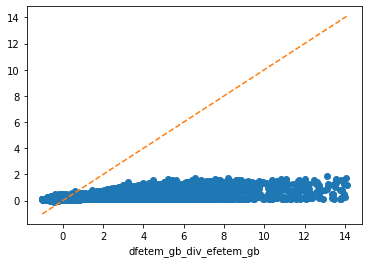

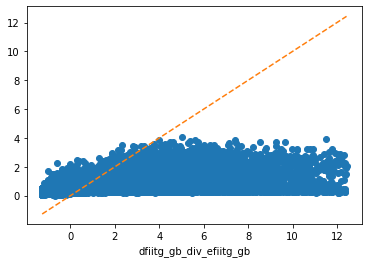

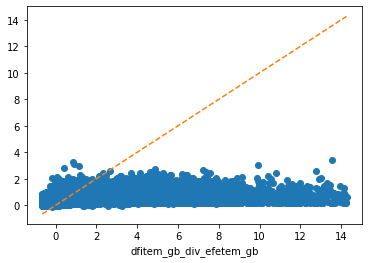

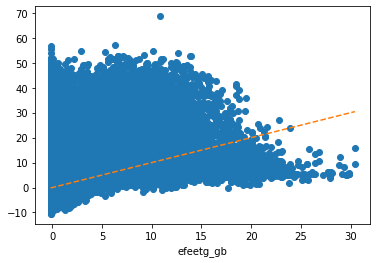

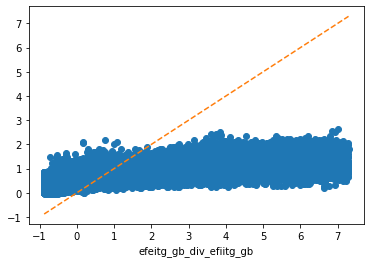

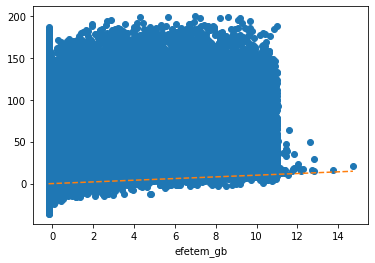

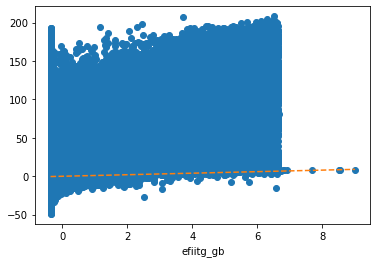

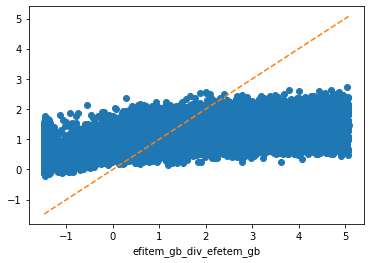

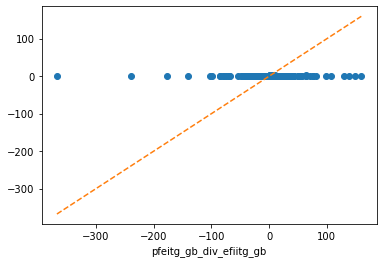

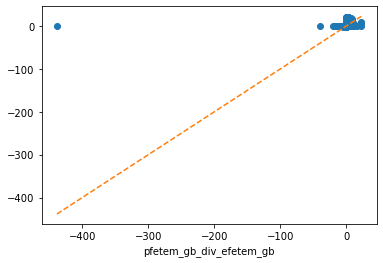

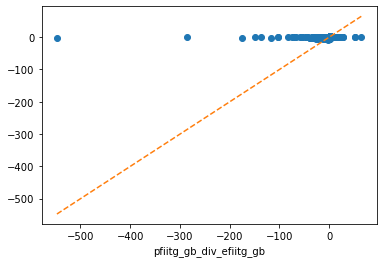

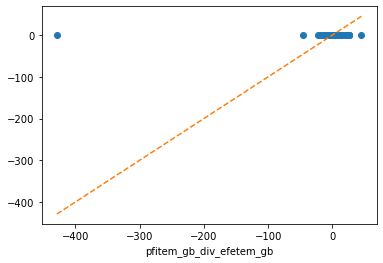

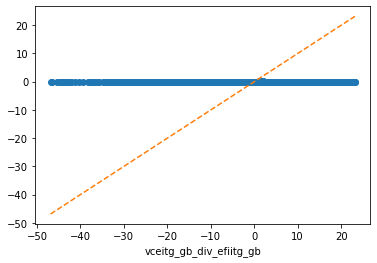

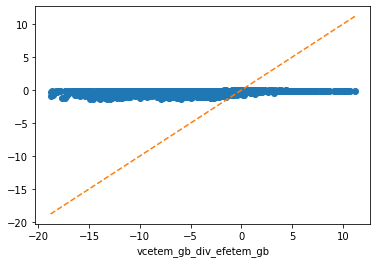

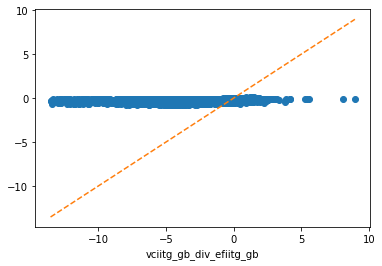

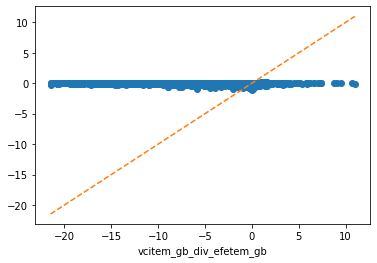

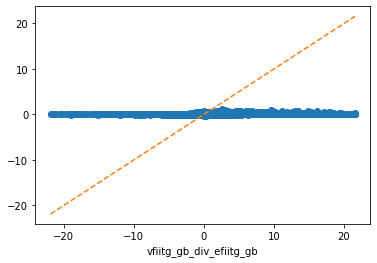

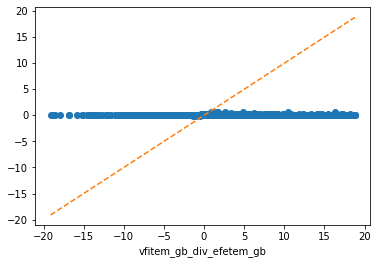

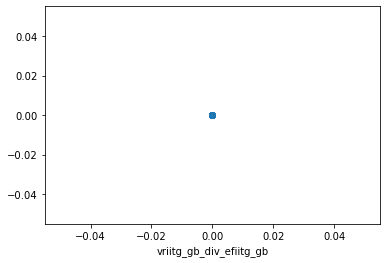

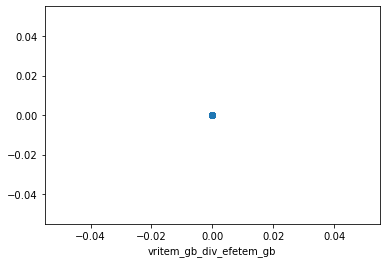

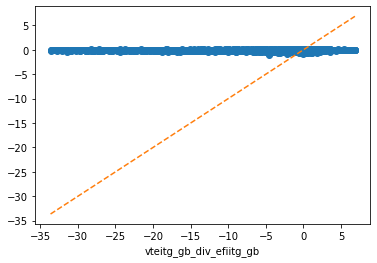

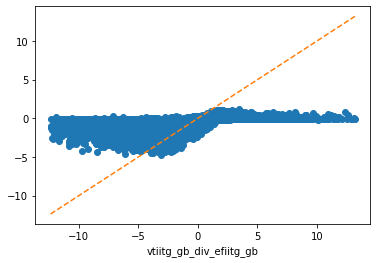

In [5]:
for target in target_keys:
    
        
    train_data = QLKNNDataset(test_data_path, columns = train_keys + [target], train = True)
    train_data.scale()
    
    test_data = QLKNNDataset(test_data_path, columns =  train_keys + [target], train = False)
    #test_data.data = test_data.data.iloc[idx]
    
    test_data.scale()  
    
    plt.figure()
    x_ = np.linspace(test_data.data[target].min(), test_data.data[target].max(), 100)
    
    plt.plot(test_data.data[target], x[target]["means"], "o")
    plt.plot(x_, x_, "--")
    
    plt.xlabel(target)